<div style="text-align:center; background-color:#ffd700; border-top-right-radius:10px; border-bottom-left-radius:10px; padding: 10px;">
    <h1 style="font-family: 'Garamond', serif; color: #4b0082;">Title: Movies Reviews Sentiments Detection</h1>
</div>



`Author`: Abdullah Khan Kakar [GitHub](https://github.com/AbdullahKhanKakar) [LinkedIn](https://www.linkedin.com/in/abdullahkhankakar/) [Kaggle](https://www.kaggle.com/abdullahkhanuet22)

# Table of Content:

1. [Data Cleaning](#sec1)
2. [EDA](#sec2)
3. [Text Preprocessing](#sec3)
4. [Model Building](#sec4)
5. [Pickle files for deployment](#sec5)

# Importing Libraries

In [4]:
# for handling dataset
import numpy as np
import pandas as pd
# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# nltk
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
# for getting punctuation marks list
import string
# vectorizers
from sklearn.feature_extraction.text import CountVectorizer

# Loading DataSet

In [5]:
df = pd.read_csv("movies_sentiment_data.csv")
# df = pd.read_csv("df_transformed.csv")

In [6]:
df.head(5)

,review,sentiment
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,positive
1,I enjoyed the movie and the story immensely! I...,positive
2,I had a hard time sitting through this. Every ...,negative
3,It's hard to imagine that anyone could find th...,negative
4,This is one military drama I like a lot! Tom B...,positive


In [7]:
df["sentiment"].value_counts()

sentiment
positive    9500
negative    9500
Name: count, dtype: int64

In [8]:
df.shape

(19000, 2)

<a id="sec1"></a>

<div style="text-align:center; background-color:#ffd700; border-top-right-radius:10px; border-bottom-left-radius:10px; padding: 10px;">
    <h1 style="font-family: 'Garamond', serif; color: #4b0082;">1. Data Cleaning</h1>
</div>

In [9]:
# label encoding the target(sentiment) column
df["sentiment"] = df["sentiment"].map({"positive":0,"negative":1})

In [10]:
df.iloc[1110,0]

'One of my favorite Twilight Zone episodes. And the next day we were in the supermarket at Hollywood Blvd. and La Brea, my father and I, and guess who was coming toward us in the aisle! Barney Phillips, but no hat on -- at least, I don\'t think he had a hat on.<br /><br />We asked him about his third eye, and he said something like he left it at home, and everybody he met that day had asked him about it.<br /><br />A friendly guy. We used to see all kinds of character actors in LA in those days.<br /><br />BTW, I was a teenager and it took a long time for me to get over the "three hands" on the other alien! <br /><br />Robyn Frisch O\'Neill <br /><br />Hollywood native and resident 1947 to 1963.'

In [11]:
# replace < /b> with None
df["review"] = df["review"].str.replace("<br />"," ")

| <p style="color:blue;font-weight:700;font-size:23px">Before Removing Break Points</p> | <p style="color:blue;font-weight:700;font-size:23px">After Removing Break Points</p> |
|----------|----------|
|One of my favorite Twilight Zone episodes. And the next day we were in the supermarket at Hollywood Blvd. and La Brea, my father and I, and guess who was coming toward us in the aisle! Barney Phillips, but no hat on -- at least, I don\'t think he had a hat on.<br /><br />We asked him about his third eye, and he said something like he left it at home, and everybody he met that day had asked him about it.<br /><br />A friendly guy. We used to see all kinds of character actors in LA in those days.<br /><br />BTW, I was a teenager and it took a long time for me to get over the "three hands" on the other alien! <br /><br />Robyn Frisch O\'Neill <br /><br />Hollywood native and resident 1947 to 1963.'|One of my favorite Twilight Zone episodes. And the next day we were in the supermarket at Hollywood Blvd. and La Brea, my father and I, and guess who was coming toward us in the aisle! Barney Phillips, but no hat on -- at least, I don\'t think he had a hat on.  We asked him about his third eye, and he said something like he left it at home, and everybody he met that day had asked him about it.  A friendly guy. We used to see all kinds of character actors in LA in those days.  BTW, I was a teenager and it took a long time for me to get over the "three hands" on the other alien!   Robyn Frisch O\'Neill   Hollywood native and resident 1947 to 1963.|


See, before there are line breaks tags in text that make it long. But after removing breaking tags, we get a short paragraph.

In [12]:
# checking null values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [13]:
# checking duplicated rows
df.duplicated().sum()

61

In [14]:
# there are 61 duplicated rows exist in dataframe, so remove it
df.drop_duplicates(inplace=True)

<a id="sec2"></a>
<div style="text-align:center; background-color:#ffd700; border-top-right-radius:10px; border-bottom-left-radius:10px; padding: 10px;">
    <h1 style="font-family: 'Garamond', serif; color: #4b0082;">2.EDA</h1>
</div>

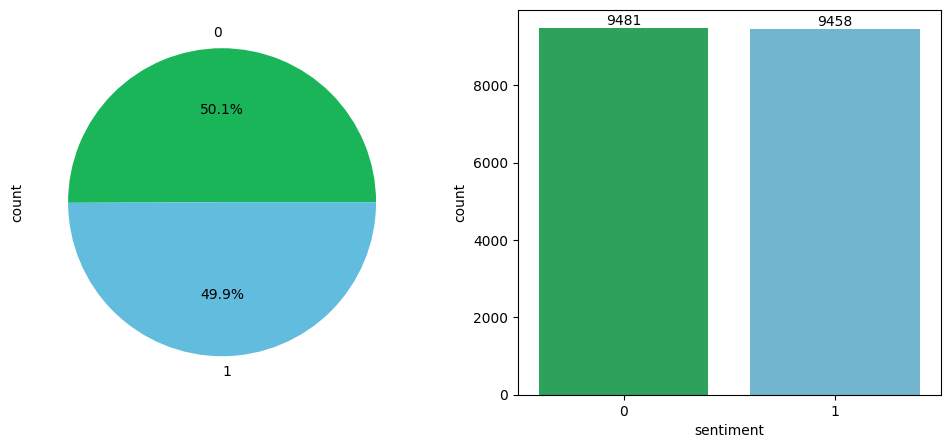

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

custom_colors = ["#19b558", "#62bcde"]
# pie plot using matplotlib.pyplot
df["sentiment"].value_counts().plot(kind="pie", autopct="%.1f%%", colors=custom_colors, ax=ax1)
# count plot using seaborn
figure = sns.countplot(x=df["sentiment"], palette=custom_colors, ax=ax2)
for bar in figure.containers:
    figure.bar_label(bar)

In [165]:
df

,review,sentiment
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,0
1,I enjoyed the movie and the story immensely! I...,0
2,I had a hard time sitting through this. Every ...,1
3,It's hard to imagine that anyone could find th...,1
4,This is one military drama I like a lot! Tom B...,0
...,...,...
18995,- Bad Stuff: This movie is real crap. Bad stun...,1
18996,"If you've seen the trailer for this movie, you...",0
18997,This has to be the all time best computer anim...,0
18998,I've seen 'NSNA' just after I've seen all Roge...,0


### Note:


<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px;">
    <p style="font-family: Arial, sans-serif; font-size: 16px; color: #333333; text-align: justify;">
        This dataframe is <b>Balanced</b>. Because target column which is sentiment has approximately equal category ratio. Balanced datasets are desirable because they prevent the model from being biased towards the majority class, thus allowing the model to learn patterns from both classes equally.
    </p>
</div>

Make `3` new columns:

- Number of characters
- Number of words
- Number of sentences

In [16]:
# create new column;; Number of Characters
df["num_characters"] = df["review"].apply(len)

In [17]:
# create new column;; Number of Words
df["num_words"] = df["review"].apply(lambda x: len(word_tokenize(x)))

In [18]:
# create new column;; Number of Sentences
df["num_sentences"] = df["review"].apply(lambda x: len(sent_tokenize(x)))

In [19]:
df

,review,sentiment,num_characters,num_words,num_sentences
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,0,1419,319,10
1,I enjoyed the movie and the story immensely! I...,0,1649,360,17
2,I had a hard time sitting through this. Every ...,1,693,156,17
3,It's hard to imagine that anyone could find th...,1,1594,336,17
4,This is one military drama I like a lot! Tom B...,0,936,206,15
...,...,...,...,...,...
18995,- Bad Stuff: This movie is real crap. Bad stun...,1,721,160,13
18996,"If you've seen the trailer for this movie, you...",0,5569,1213,32
18997,This has to be the all time best computer anim...,0,383,74,5
18998,I've seen 'NSNA' just after I've seen all Roge...,0,529,115,6


In [20]:
df.describe()

,sentiment,num_characters,num_words,num_sentences
count,18939.000000,18939.000000,18939.000000,18939.000000
mean,0.499393,1290.584297,264.922805,12.312583
std,0.500013,976.193961,196.443201,8.796635
min,0.000000,53.000000,11.000000,1.000000
25%,0.000000,688.000000,144.000000,7.000000
50%,0.000000,951.000000,198.000000,10.000000
75%,1.000000,1568.000000,322.000000,15.000000
max,1.000000,10261.000000,2139.000000,143.000000


In [21]:
# positive(0) sentiments statistics
df[df["sentiment"]==0].describe()

,sentiment,num_characters,num_words,num_sentences
count,9481.0,9481.000000,9481.000000,9481.000000
mean,0.0,1301.212214,265.262420,11.979011
std,0.0,1014.712475,202.370114,8.563789
min,0.0,67.000000,11.000000,1.000000
25%,0.0,679.000000,142.000000,7.000000
50%,0.0,950.000000,197.000000,10.000000
75%,0.0,1578.000000,323.000000,15.000000
max,0.0,10261.000000,2139.000000,107.000000


In [22]:
# negative(1) sentiments statistics
df[df["sentiment"]==1].describe()

,sentiment,num_characters,num_words,num_sentences
count,9458.0,9458.000000,9458.000000,9458.000000
mean,1.0,1279.930535,264.582364,12.646966
std,0.0,935.924890,190.326823,9.012089
min,1.0,53.000000,12.000000,1.000000
25%,1.0,698.000000,147.000000,7.000000
50%,1.0,952.500000,200.000000,10.000000
75%,1.0,1559.000000,322.000000,15.000000
max,1.0,7681.000000,1603.000000,143.000000


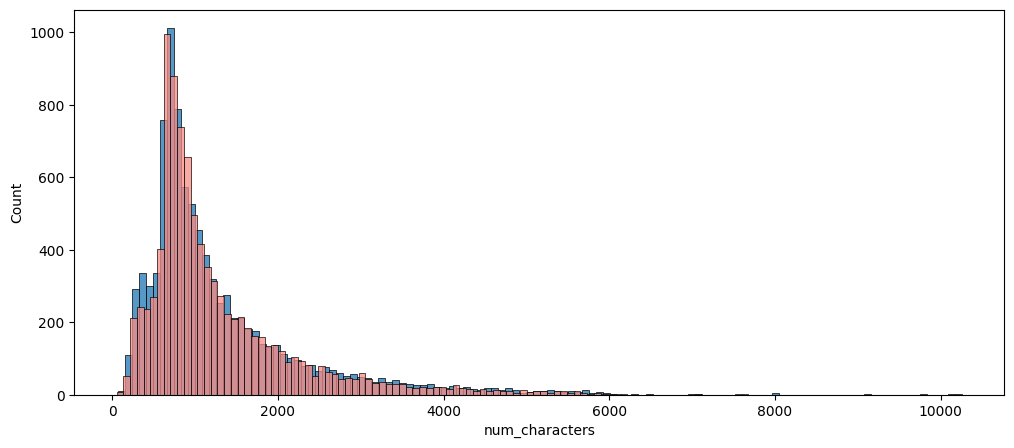

In [23]:
# plotting: number of characters features showing both positive and negative sentiments separatly
plt.figure(figsize=(12,5))
sns.histplot(x=df[df["sentiment"]==0]["num_characters"])
sns.histplot(x=df[df["sentiment"]==1]["num_characters"], color="#fa8c84")
plt.show()

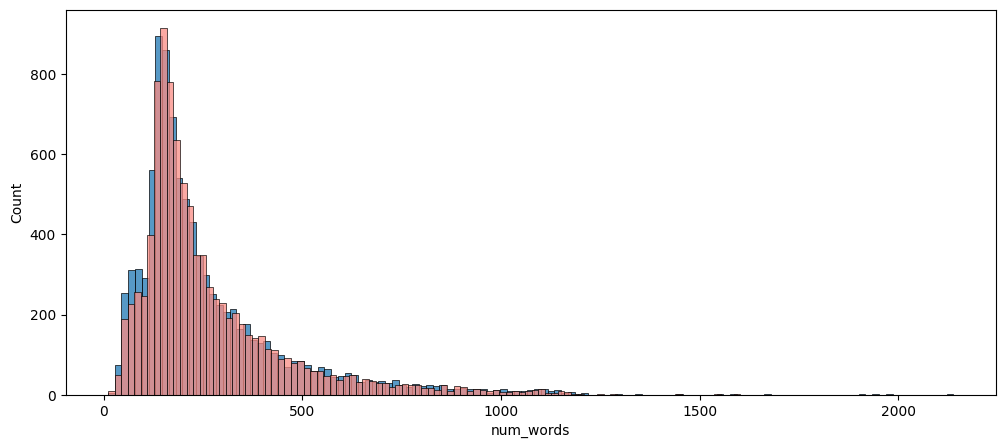

In [24]:
# plotting: number of words features showing both positive and negative sentiments separatly
plt.figure(figsize=(12,5))
sns.histplot(x=df[df["sentiment"]==0]["num_words"])
sns.histplot(x=df[df["sentiment"]==1]["num_words"], color="#fa8c84")
plt.show()

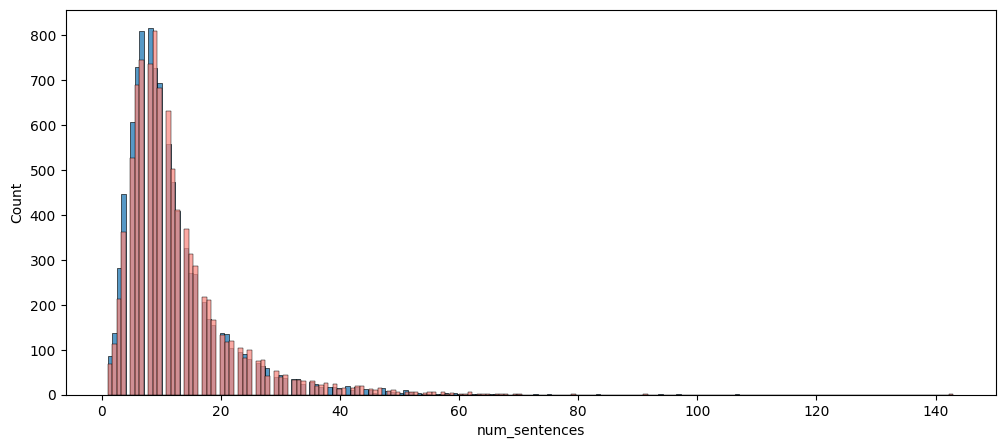

In [25]:
# plotting: number of sentences features showing both positive and negative sentiments separatly
plt.figure(figsize=(12,5))
sns.histplot(x=df[df["sentiment"]==0]["num_sentences"])
sns.histplot(x=df[df["sentiment"]==1]["num_sentences"], color="#fa8c84")
plt.show()

C:\Users\DELL PC\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


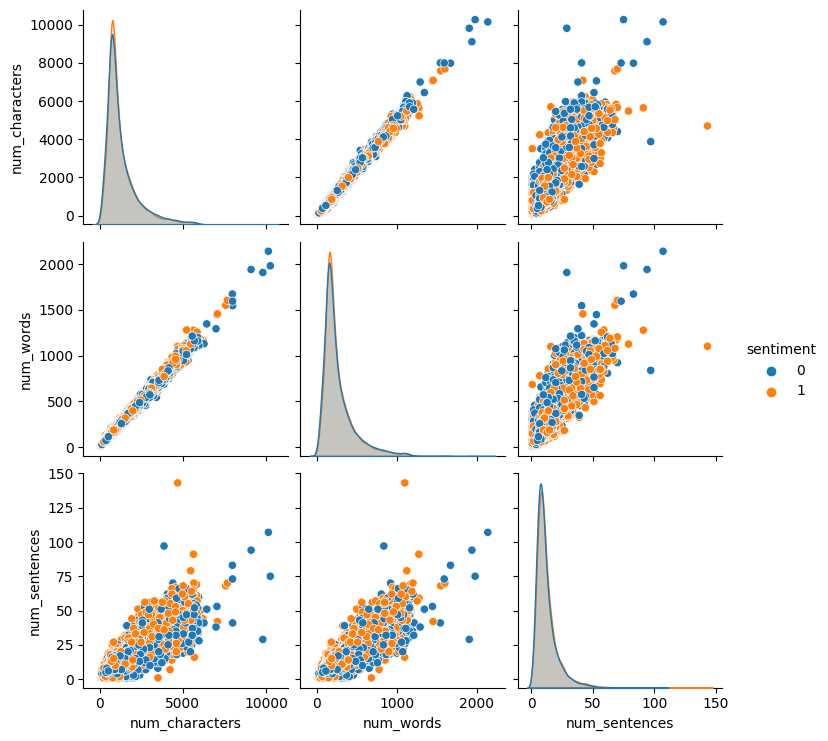

In [26]:
sns.pairplot(df, hue="sentiment")

<Axes: >

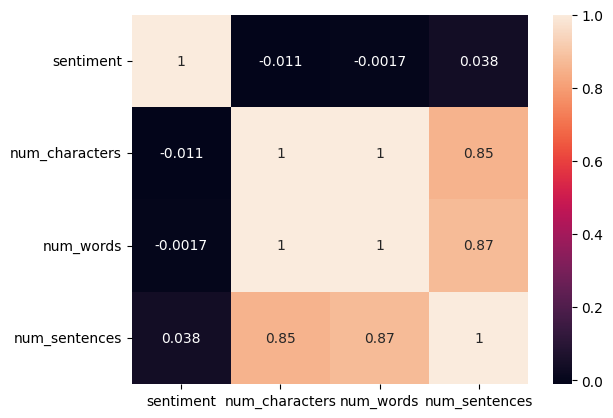

In [27]:
# correlation heatmap
sns.heatmap(df.select_dtypes(["int"]).corr(), annot=True)

### Note:


<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px;">
    <p style="font-family: Arial, sans-serif; font-size: 16px; color: #333333; text-align: justify;">
       New columns such as number of characters, words and sentences have strong relationship between them that shows there is <b>High Multicollinearity</b> between these columns. So, we will not use these columns or features in <b>Model Training</b> but will perform analysis through these features.
    </p>
</div>


<a id="sec3"></a>

<div style="text-align:center; background-color:#ffd700; border-top-right-radius:10px; border-bottom-left-radius:10px; padding: 10px;">
    <h1 style="font-family: 'Garamond', serif; color: #4b0082;">3.Text Preprocessing</h1>
</div>

### Performing Steps:

1. Lowering text
2. Tokenizing
3. Removing special characters
4. Removing stop words and punctuation
5. Apply stemming

In [179]:
# string.punctuation

In [180]:
# stopwords.words('english')

In [28]:
def transform_text(text):
    text = text.lower()
    text = word_tokenize(text)
    
    y = []
    for word in text:
        if word.isalnum():
            y.append(word)
    
    text = y[:]
    y.clear()
    for word in text:
        if word not in stopwords.words("english") and word not in string.punctuation:
            y.append(word)
    
    text = y[:]
    y.clear()
    for word in text:
        y.append(PorterStemmer().stem(word))
    
    return " ".join(y)


In [29]:
# testing function
transform_text("Ali congratulation is my friend &88 hello thanks thank loving lover love loves yesterday yesterdays")

'ali congratul friend 88 hello thank thank love lover love love yesterday yesterday'

In [132]:
# applying this function to dataset 'review' column
df["transformed_text"] = df["review"].apply(transform_text)

| <p style="color:blue;font-weight:700;font-size:23px">Before Text Preprocessing</p> | <p style="color:blue;font-weight:700;font-size:23px">After Text Preprocessing</p> |
|----------|----------|
|I first saw Jake Gyllenhaal in Jarhead (2005) a little while back and, since then, I've been watching every one of his movies that arrives on my radar screen. Like Clive Owen, he has an intensity (and he even resembles Owen somewhat) that just oozes from the screen. I feel sure that, if he lands some meaty roles, he'll crack an Oscar one day...  That's not to denigrate this film at all.  It's a fine story, with very believable people (well, it's based upon the author's early shenanigans with rocketry), a great cast \x96 Chris Cooper is always good, and Laura Dern is always on my watch list \x96 with the appropriate mix of humor, pathos, excitement...and the great sound track with so many rock n roll oldies to get the feet tapping.  But, this film had a very special significance for me: in 1957, I was the same age as Homer Hickham; like him, I looked up at the night stars to watch Sputnik as it scudded across the blackness; like Homer also, I experimented with rocketry in my backyard and used even the exact same chemicals for fuel; and like Homer, I also had most of my attempts end in explosive disaster! What fun it was...  I didn't achieve his great (metaphorical and physical) heights though. But, that's what you find out when you see this movie.  Sure, it's a basic family movie, but that's a dying breed these days, it seems. Take the time to see it, with the kids: you'll all have a lot of good laughs.|first saw jake gyllenha jarhead 2005 littl back sinc watch everi one movi arriv radar screen like clive owen intens even resembl owen somewhat ooz screen feel sure land meati role crack oscar one day denigr film fine stori believ peopl well base upon author earli shenanigan rocketri great cast chri cooper alway good laura dern alway watch list appropri mix humor patho excit great sound track mani rock n roll oldi get feet tap film special signific 1957 age homer hickham like look night star watch sputnik scud across black like homer also experi rocketri backyard use even exact chemic fuel like homer also attempt end explos disast fun achiev great metaphor physic height though find see movi sure basic famili movi die breed day seem take time see kid lot good laugh.|


See, before text preprocessing, text size was great. But after it reduces.

In [35]:
df

,review,sentiment,num_characters,num_words,num_sentences,transformed_text
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,0,1419,319,10,first saw jake gyllenha jarhead 2005 littl bac...
1,I enjoyed the movie and the story immensely! I...,0,1649,360,17,enjoy movi stori immens seen origin 1939 belie...
2,I had a hard time sitting through this. Every ...,1,693,156,17,hard time sit everi singl twist turn predict s...
3,It's hard to imagine that anyone could find th...,1,1594,336,17,hard imagin anyon could find short favorit see...
4,This is one military drama I like a lot! Tom B...,0,936,206,15,one militari drama like lot tom bereng play mi...
...,...,...,...,...,...,...
18934,- Bad Stuff: This movie is real crap. Bad stun...,1,721,160,13,bad stuff movi real crap bad stunt one thing l...
18935,"If you've seen the trailer for this movie, you...",0,5569,1213,32,seen trailer movi pretti much know expect see ...
18936,This has to be the all time best computer anim...,0,383,74,5,time best comput anim classic even though anim...
18937,I've seen 'NSNA' just after I've seen all Roge...,0,529,115,6,seen seen roger must say felt good see conneri...


In [36]:
# Performing analysis on ham and spam emails separately to see common and repeating words through Word Cloud
from wordcloud import WordCloud

wc = WordCloud(width=600, height=500, min_font_size=12, background_color="white")

In [44]:
# for ham emails/messages
zero = wc.generate(df[df["sentiment"]==0]["transformed_text"].str.cat(sep=" "))

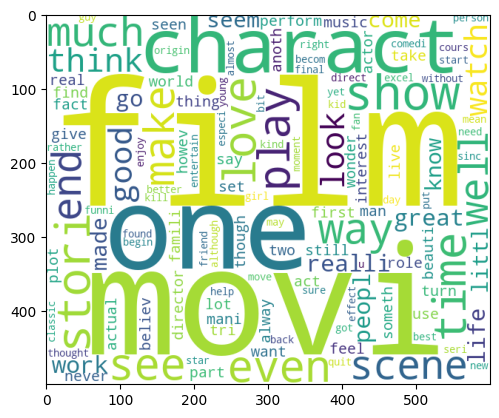

In [45]:
plt.imshow(zero)

In [46]:
# for spam emails/messages
one = wc.generate(df[df["sentiment"]==1]["transformed_text"].str.cat(sep=" "))

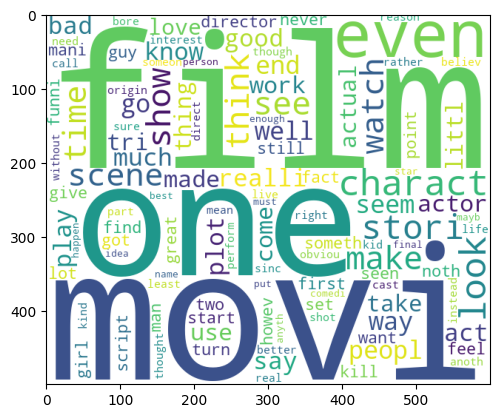

In [47]:
plt.imshow(one)

In [48]:
# ploting top repeated words
from collections import Counter

In [49]:
def top_words(target):
    words = []
    for msg in df[df["sentiment"] == target]["transformed_text"].tolist():
        for word in msg.split():
            words.append(word)
            
    sns.barplot(x=pd.DataFrame(Counter(words).most_common(30))[0], y=pd.DataFrame(Counter(words).most_common(30))[1])
    plt.xticks(rotation="vertical")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()

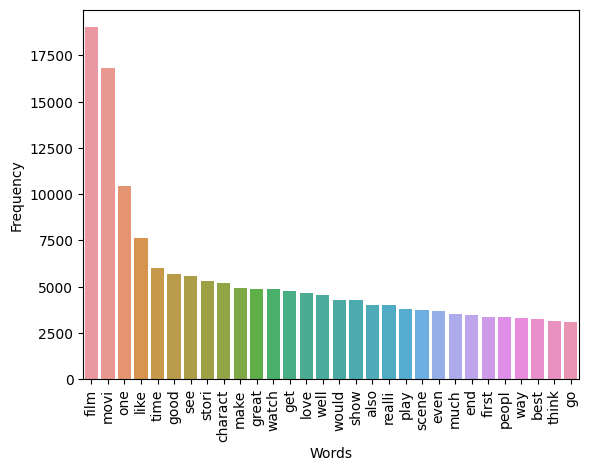

In [50]:
top_words(0)

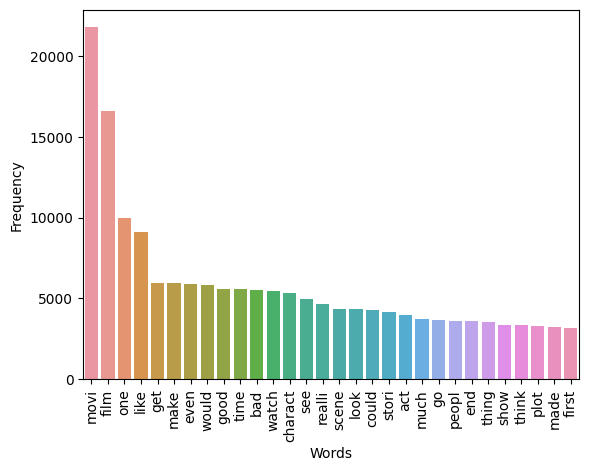

In [51]:
top_words(1)

<a id="sec4"></a>

<div style="text-align:center; background-color:#ffd700; border-top-right-radius:10px; border-bottom-left-radius:10px; padding: 10px;">
    <h1 style="font-family: 'Garamond', serif; color: #4b0082;">4.Model Building</h1>
</div>

In [9]:
# vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=30000)

In [10]:
x = cv.fit_transform(df["transformed_text"]).toarray()

In [11]:
y = df["sentiment"].values

In [12]:
x.shape , y.shape

((18939, 30000), (18939,))

In [14]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Train Test Split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [16]:
x_train.shape, x_test.shape

((15151, 30000), (3788, 30000))

In [ ]:
# for model in [GaussianNB(), MultinomialNB(), BernoulliNB()]:
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)
#     print(f"{model}")
#     print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
#     print(f"Precision Score: {precision_score(y_test, y_pred)}")
#     print(f"Confusion Matrix : \n{confusion_matrix(y_test, y_pred)}")
#     print("\n===================\n")

# Model Training

In [30]:
tf = RandomForestClassifier()
tf.fit(x_train, y_train)
y_pred = tf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

<a id="sec5"></a>

<div style="text-align:center; background-color:#ffd700; border-top-right-radius:10px; border-bottom-left-radius:10px; padding: 10px;">
    <h1 style="font-family: 'Garamond', serif; color: #4b0082;">5.Pickle Files for Deployment</h1>
</div>

In [18]:
import pickle

pickle.dump(cv ,open("count_vectorizer.pkl", "wb"))
pickle.dump(tf ,open("rf.pkl", "wb"))

<p style="color:blue;font-weight:900;">End of Code!</p>